# Hybrid Image

/var/folders/_s/qy_32wlx75bb90myz6qtnzbr0000gn/T/ipykernel_7479/3904728980.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  hybrid = ifft2(Hybrid).astype(np.uint8)


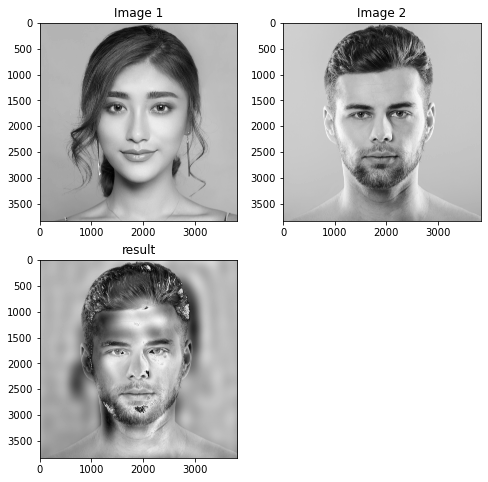

In [ ]:
import cv2
import numpy as np;
from matplotlib import pyplot as plt 
from scipy.fft import fft2
from scipy.fft import ifft2

#import sources
img1 = cv2.imread("woman.jpg",0)
img2 = cv2.imread("bearded_man.jpg",0)

#generate low pass and high pass filters
m,n = img1.shape
th = int(np.floor(min(m,n)/300))
Lp = np.zeros((m,n))

for p in range(0,th+1):
    for q in range(0,th-p):
        Lp[p][q] = 1
    for q in range(p+n-th,n):
        Lp[p][q] = 1
for p in range(m-th-1,m):
    for q in range(0,th-m+p+1):
        Lp[p][q] = 1
    for q in range(m+n-p-th-1,n):
        Lp[p][q] = 1

Hp = 1 - Lp

#process the images
Img1 = fft2(img1)
Img2 = fft2(img2)

Hybrid = Img1*Lp + Img2*Hp

hybrid = ifft2(Hybrid).astype(np.uint8)


#plot the images 
plt.figure(num='Hybridization',figsize=(8,8))

plt.subplot(2,2,1) 
plt.title('Image 1')
plt.imshow(img1,cmap='gray',vmin='0',vmax='255')

plt.subplot(2,2,2) 
plt.title('Image 2')
plt.imshow(img2,cmap='gray',vmin='0',vmax='255')

plt.subplot(2,2,3) 
plt.title('result')
plt.imshow(hybrid,cmap='gray',vmin='0',vmax='255')


plt.show()


# Morphology

<function matplotlib.pyplot.show(close=None, block=None)>

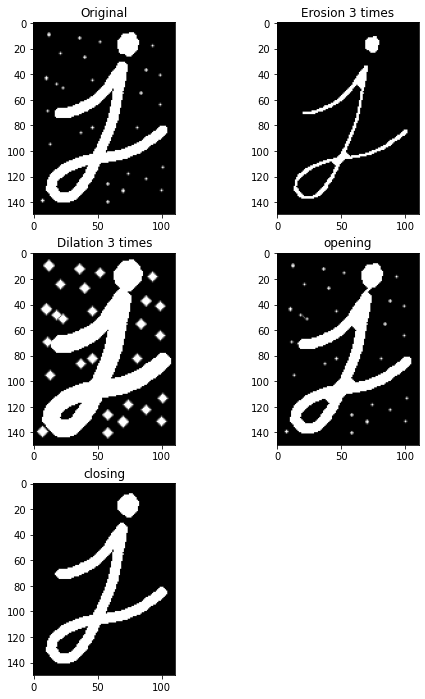

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

img1 = cv2.imread('Morph.png',0)
def erod(img,n=1):
    result = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            result[i][j] = min(img[i][j],img[i-1][j],img[i+1][j],img[i][j-1],img[i][j+1])
    if (n==1):
        return result
    else:
        return erod(result,n-1)

def dila(img,n=1):
    result = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            result[i][j] = max(img[i][j],img[i-1][j],img[i+1][j],img[i][j-1],img[i][j+1])
    if (n==1):
        return result
    else: 
        return dila(result,n-1)

plt.figure(num=1,figsize=(8,12))

plt.subplot(3,2,1)
plt.title("Original")
plt.imshow(img1,cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,2)
plt.title("Erosion 3 times")
plt.imshow(erod(img1,3),cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,3)
plt.title("Dilation 3 times")
plt.imshow(dila(img1,3),cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,4)
plt.title("opening")
plt.imshow(erod(dila(img1,3),3),cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,5)
plt.title("closing")
plt.imshow(dila(erod(img1,3),3),cmap='gray',vmin=0,vmax=255)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

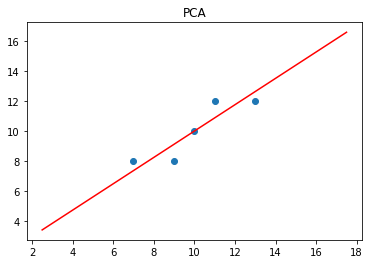

In [26]:
import numpy
import matplotlib.pyplot as plt

A = np.array([[7,8],[9,8],[10,10],[11,12],[13,12]])

def PCA( arr : np.ndarray ):
    m,n = arr.shape[0],arr.shape[1]
    average = np.zeros(arr.shape)
    for i in range(n):
        avg = sum(arr[:,i])/m
        average[:,i] = avg
    arr = arr - average
    U, S, Vh = np.linalg.svd(arr)[0],np.linalg.svd(arr)[1],np.linalg.svd(arr)[2]
    return Vh[np.argmax(S)]

p1 = [10,10] - 10*PCA(A)
p2 = [10,10] + 10*PCA(A)
plt.plot([p1[0],p2[0]],[p1[1],p2[1]],color='r')
plt.scatter(A[:,0],A[:,1])
plt.title("PCA")
plt.show


In [58]:
import numpy
import matplotlib.pyplot as plt



A = np.array([[2,1,-3],[-1,3,5],[0,2,4],[4,-2,-1],[1,0,4],[-2,5,5]])

def PCA( arr : np.ndarray ):
    m,n = arr.shape[0],arr.shape[1]
    average = np.zeros(arr.shape)
    for i in range(n):
        avg = sum(arr[:,i])/m
        average[:,i] = avg
    arr = arr - average
    U, S, Vh = np.linalg.svd(arr)[0],np.linalg.svd(arr)[1],np.linalg.svd(arr)[2]
    iMax = np.argmax(S)
    return average, S, U, Vh

avg, s, u, Vh = PCA(A)
i = np.argmax(s)
print("principal component:")
print("S = ", s[i])
print("Vh = ", Vh[i])
print("U(transpose) = ", u[:,i], "\n")
print("近似結果 = \n", s[i]*np.matmul(u[:,i].reshape(6,1),Vh[i].reshape(1,3))+avg)

principal component:
S =  9.767563936868324
Vh =  [-0.47609396  0.47305261  0.74132029]
U(transpose) =  [-0.49398463  0.35627337  0.18320393 -0.58496997  0.03759964  0.50187766] 

近似結果 = 
 [[ 2.96383263 -0.78249135 -1.24355667]
 [-0.99010364  3.14618663  4.91307082]
 [-0.18528257  2.34650687  3.65989344]
 [ 3.38693979 -1.20289565 -1.90237184]
 [ 0.49181787  1.67373184  2.60558834]
 [-1.66720408  3.81896166  5.96737592]]


<function matplotlib.pyplot.show(close=None, block=None)>

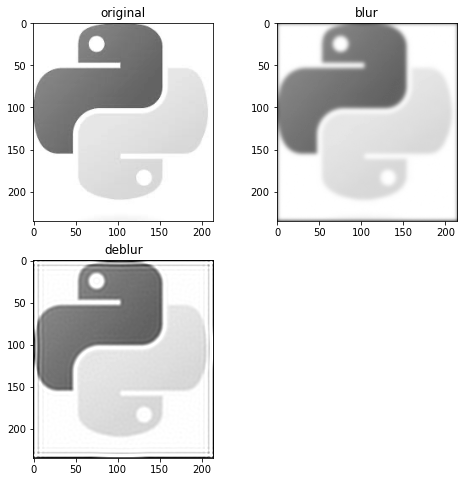

In [ ]:
import cv2
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from scipy.fft import fft2
from scipy.fft import ifft2


img = cv2.imread('python.png',0)

k = np.zeros((21,21))
for i in range(-10,11):
    for j in range(-10,11):
        k[i+10][j+10] = np.exp(-0.1*(i**2+j**2))
k = k/np.sum(k)



blur = scipy.signal.convolve2d(img,k,'same') 
noise = np.random.rand(blur.shape[0],blur.shape[1]) - 0.5
blur = blur + noise
blur = blur.astype(np.uint8)


#deblur 
M,N = blur.shape
k1 = np.zeros(blur.shape)

for i in range(0,11):
    for j in range(0,11):
        k1[i][j] = k[i+10][j+10]   

for i in range(1,11):
    for j in range(0,11):
        k1[M-i][j] = k[10-i][j+10]

for i in range(0,11):
    for j in range(1,11):
        k1[i][N-j] = k[10+i][10-j]

for i in range(1,11):
    for j in range(1,11):
        k1[M-i][N-j] = k[10-i][10-j]
 


Y = fft2(blur)
K = fft2(k1)
H = 1/(K+0.003/np.conjugate(K))

deblur = abs(ifft2(np.multiply(Y,H)))




plt.figure(num=1,figsize=(8,8))

plt.subplot(2,2,1)
plt.title("original")
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

plt.subplot(2,2,2)
plt.title("blur")
plt.imshow(blur,cmap='gray',vmin=0,vmax=255)

plt.subplot(2,2,3)
plt.title("deblur")
plt.imshow(deblur,cmap='gray',vmin=0,vmax=255)

plt.show
